# Drift correction through phase cross correlation 
Given 2 images computes shift in pixels in x and y. 
#### Contributor(s): Utkarsh Pratiush <utkarshp1161@gmail.com> - 26th March 2025
#### edited - 
   

In [43]:
from stemOrchestrator.process import compute_drift, plot_drift_comparison, tiff_to_numpy, HAADF_tiff_to_png, compute_drift_GD, tiff_metadata
import matplotlib.pyplot as plt


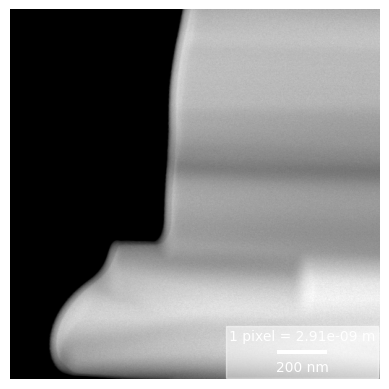

beam shift in x and y 7.86960916e-08 1.07842792e-07


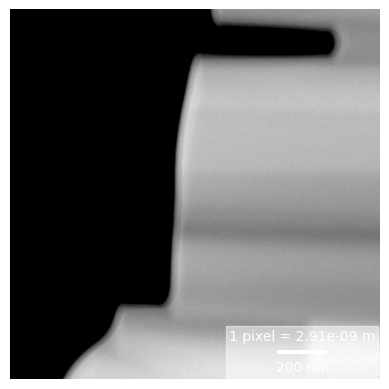

beam shift in x and y 1.45733503e-07 -1.45733503e-07
shift-oringinal-x 23.00000000686184
shift-oringinal-y -86.99999992451974


In [44]:
data_folder = "../../data"
image1_path = f"{data_folder}/drift_frame11.tiff"
image2_path = f"{data_folder}/drift_frame12.tiff"
pixel_size_x, pixel_size_y =  HAADF_tiff_to_png(image1_path, return_pixel_size = True)
meta = tiff_metadata(image1_path)
beam_shift_x1, beam_shift_y1 = meta['FEI_TITAN_parsed']['Metadata']['Optics']['BeamShift']["X"], meta['FEI_TITAN_parsed']['Metadata']['Optics']['BeamShift']["Y"]
print("beam shift in x and y", beam_shift_x1, beam_shift_y1)


HAADF_tiff_to_png(image2_path)
meta = tiff_metadata(image2_path)
beam_shift_x2, beam_shift_y2 = meta['FEI_TITAN_parsed']['Metadata']['Optics']['BeamShift']["X"], meta['FEI_TITAN_parsed']['Metadata']['Optics']['BeamShift']["Y"]
print("beam shift in x and y", beam_shift_x2, beam_shift_y2)


shft_original_x = (float(beam_shift_x2) - float(beam_shift_x1))/pixel_size_x
shft_original_y = (float(beam_shift_y2) - float(beam_shift_y1))/pixel_size_y

print("shift-oringinal-x", shft_original_x )
print("shift-oringinal-y", shft_original_y )



-87.0 -9.0


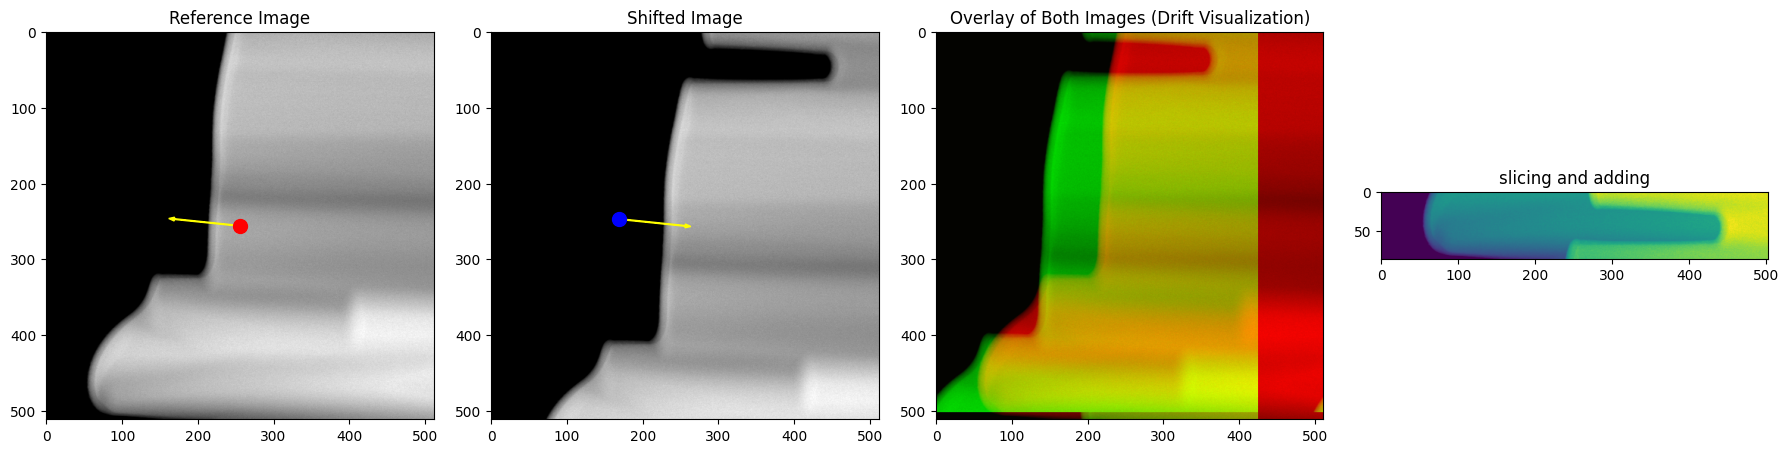

In [45]:
# haadf_np_array_baseline, haadf_np_array_shifted = tiff_to_numpy(f"{data_folder}/drift_frame1.tiff"), tiff_to_numpy(f"{data_folder}/drift_frame2.tiff")
haadf_np_array_baseline, haadf_np_array_shifted = tiff_to_numpy(image1_path), tiff_to_numpy(image2_path)
# shift_x, shift_y = compute_drift_GD(haadf_np_array_baseline, haadf_np_array_shifted, normalization = "low_mag")
shift_x, shift_y = compute_drift_GD(haadf_np_array_baseline, haadf_np_array_shifted, normalization = "low_mag")

print(shift_x, shift_y)
fig = plot_drift_comparison(haadf_np_array_baseline, haadf_np_array_shifted, shift_x, shift_y)

